# NCAA College Basketball Analysis

## by Justin Sierchio

This Jupyter Notebook will be examining NCAA Dvision 1 basketball team statistics from the 2014/15 to 2018/19 seasons. 

This data is in .csv file format and is from Kaggle under a Public Domain License. It can be found at:https://www.kaggle.com/andrewsundberg/college-basketball-dataset/download. Additional related information can be found at: https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb.csv.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_CBB = pd.read_csv("cbb.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Open College Basketball Division 1 dataset and display 1st 5 rows
df_CBB.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


At this point, let's define what each of the columns means:
<ul>
    <li>1 - TEAM: The NCAA Division 1 School Name</li>
    <li>2 - CONF: Conference in which the team is a member</li>
    <li>3 - G: Number of games played that season</li>
    <li>4 - W: Number of games won that season</li>
    <li>5 - AOE: Adjusted Offensive Efficiency - # of points scored / 100 possessions</li>
    <li>6 - ADE: Adjusted Defensive Efficiency - # of points allowed/ 100 possessions</li>
    <li>7 - BARTHAG: Chance of beating an average Division 1 team</li>
    <li>8 - EFG_O: Effective Field Goal Percentage Shot</li>
    <li>9 - EFG_D: Effective Field Goal Percentage Allowed</li>
    <li>10 - TOR: Turnover % Allowed (Turnover Rate)</li>
    <li>11 - TORD: Turnover % Committed (Steal Rate)</li>
    <li>12 - ORB: Offensive Rebound %</li>
    <li>13 - DRB: Defensive Rebound %</li>
    <li>14 - FTR: Free Throw Rate (How Often Team Shoots Free Throws)</li>
    <li>15 - FTRD: Free Throw Rate Allowed</li>
    <li>16 - 2P_O: 2-Point Shooting % Made</li>
    <li>17 - 2P_D: 2-Point Shooting % Allowed</li>
    <li>18 - 3P_O: 3-Point Shooting % Made</li>
    <li>19 - 3P_D: 3-Point Shooting % Allowed</li>
    <li>20 - ADJ_T: Adjusted Tempo (Estimate of Possessions / 40 minutes)</li>
    <li>21 - WAB: Wins against Teams that made NCAA Tournament</li>
    <li>22 - POSTSEASON: Round in NCAA Tournament Team Advanced</li>
    <li>23 - SEED: Seed of team in NCAA Tournament</li>
    <li>24 - Year: Season Year</li>

## Data Cleaning

First, let us get an understanding of the characteristics of this dataset.

In [4]:
# Characteristics of the College Basketball dataset
df_CBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

Let's find out how many 'NULL' values we have in the dataset.

In [5]:
# Find 'NULL' values in College Basketball dataset
df_CBB.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1417
SEED          1417
YEAR             0
dtype: int64

Given our knowledge of NCAA Division 1 Men's Basketball, the 'NULL' values for the postseason mean those teams did not qualify for the NCAA Division 1 Men's Basketball Tournament. Rather that remove that data, let's convert those 'NULL' values to 'NONE' so we can perform analysis on them later.

In [6]:
# Replace all 'NULL' values in 'POSTSEASON' and 'SEED' columns with 'NONE'.
df_CBB["POSTSEASON"].fillna("NONE", inplace = True)
df_CBB["SEED"].fillna("NONE", inplace = True)

df_CBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

It appears that this dataset is clean enough for data exploration!

## Exploratory Data Analysis

As an initial part of our analysis, let's find the team that won the most number of games over the timeframe of the dataset: 2014/15 to 2018/19.

In [7]:
# Find the team that won the most number of games over the 5 seasons in the dataset.

# Group individual seasons by team name and sum up the number of wins per season
df_CBBWins = df_CBB[['TEAM','W']]
df_CBBCumTeamWins = df_CBBWins.groupby(['TEAM']).apply(lambda x: (x.groupby('TEAM').sum().sort_values('TEAM', ascending=False)))

# Sort Teams by Number of Wins
df_CBBCumTeamWinsSorted = df_CBBCumTeamWins.sort_values('W', ascending=False)
print('These are the Top 10 Teams in Cumulative Wins over 2014/15 to 2018/19 seasons:\n')
print(df_CBBCumTeamWinsSorted.head(10))

These are the Top 10 Teams in Cumulative Wins over 2014/15 to 2018/19 seasons:

                                 W
TEAM           TEAM               
Gonzaga        Gonzaga         163
Villanova      Villanova       162
Kentucky       Kentucky        153
Duke           Duke            149
Virginia       Virginia        148
Kansas         Kansas          147
North Carolina North Carolina  147
Michigan St.   Michigan St.    138
Oregon         Oregon          136
Arizona        Arizona         135


So, we can see over the the 5 season timeframe, Gonzaga led all Men's Division 1 with 163 wins. Let's do a similar analysis by looking at the team that led the nation in Free Throws Made / Game and 3-Point Percentage, respectively.

In [8]:
# Find the team that made the most Free Throws per game over the 5 seasons in the dataset.

# Group individual seasons by team name and find the the average number of Free Throws Made / Game
df_CBBFreeThrows = df_CBB[['TEAM','FTR']]
df_CBBCumTeamFreeThrows = df_CBBFreeThrows.groupby(['TEAM']).apply(lambda x: (x.groupby('TEAM').
                                                                        mean().sort_values('TEAM', ascending=False)))

# Sort Teams by Number of Free Throws Made / Game
df_CBBCumTeamFreeThrowsSorted = df_CBBCumTeamFreeThrows.sort_values('FTR', ascending=False);
print('These are the Top 10 Teams in Free Throws Made / Game over 2014/15 to 2018/19 seasons [Cumulative]:\n')
print(df_CBBCumTeamFreeThrowsSorted.head(10))

These are the Top 10 Teams in Free Throws Made / Game over 2014/15 to 2018/19 seasons [Cumulative]:

                                       FTR
TEAM              TEAM                    
Texas Southern    Texas Southern     43.26
Georgia           Georgia            42.66
New Orleans       New Orleans        41.88
Evansville        Evansville         41.82
Tulsa             Tulsa              41.76
Kentucky          Kentucky           41.70
Weber St.         Weber St.          41.36
Grambling St.     Grambling St.      41.12
Cal St. Fullerton Cal St. Fullerton  40.88
Wyoming           Wyoming            40.82


As we can see, Texas Southern lead the nation with an average of 43.26 Free Throws per game over the 5 seasons from 2014/15 to 2018/19.

In [9]:
# Find the team that had the best 3-point shooting % the most number of games over the 5 seasons in the dataset.

# Group individual seasons by team name and take the average 3-point shooting percentages
df_CBB3PointPerc = df_CBB[['TEAM','3P_O']]
df_CBBCumTeam3PointPerc = df_CBB3PointPerc.groupby(['TEAM']).apply(lambda x: (x.groupby('TEAM').
                                                                        mean().sort_values('TEAM', ascending=False)))

# Sort Teams by Highest 3-Point Percentage
df_CBBCumTeam3PointPercSorted = df_CBBCumTeam3PointPerc.sort_values('3P_O', ascending=False);
print('These are the Top 10 Teams in 3-Point Percenage over 2014/15 to 2018/19 seasons [Cumulative]:\n')
print(df_CBBCumTeam3PointPercSorted.head(10))

These are the Top 10 Teams in 3-Point Percenage over 2014/15 to 2018/19 seasons [Cumulative]:

                              3P_O
TEAM          TEAM                
Wofford       Wofford        39.54
Michigan St.  Michigan St.   39.42
Lehigh        Lehigh         39.26
Saint Mary's  Saint Mary's   39.26
Kansas        Kansas         38.94
Idaho         Idaho          38.48
Denver        Denver         38.44
Virginia Tech Virginia Tech  38.44
Virginia      Virginia       38.36
Marquette     Marquette      38.34


As we can see, Wofford lead the nation with an average of 39.54% of all 3-Point Attempts Made per game over the 5 seasons from 2014/15 to 2018/19.

At this juncture, let's look at some metadata. First, let's see how each conference did in beating an average Division 1 team.

In [10]:
# Find the likelihood that a team in a given conference could beat an average Division 1 team.

# Group individual seasons by conference team and take the average of the 'BARTHAG' scores
df_CBBConfWinning = df_CBB[['CONF','BARTHAG']]
df_CBBCumConfWinning = df_CBBConfWinning.groupby(['CONF']).apply(lambda x: (x.groupby('CONF').
                                                                        mean().sort_values('CONF', ascending=False)))

# Sort Teams by Highest Likelihood of Beating Average Division 1 Teams
df_CBBCumConfWinningSorted = df_CBBCumConfWinning.sort_values('BARTHAG', ascending=False);
print('These are the Conference Rankings by Likelihood of Beating Average Division 1 Teams:\n')
print(df_CBBCumConfWinningSorted.head(50))

These are the Conference Rankings by Likelihood of Beating Average Division 1 Teams:

            BARTHAG
CONF CONF          
B12  B12   0.860170
ACC  ACC   0.820261
BE   BE    0.803320
B10  B10   0.800939
SEC  SEC   0.790094
P12  P12   0.720798
Amer Amer  0.644409
A10  A10   0.594563
WCC  WCC   0.576142
MWC  MWC   0.571245
MVC  MVC   0.552196
MAC  MAC   0.519375
Ivy  Ivy   0.467645
Ind  Ind   0.464400
CAA  CAA   0.459290
SB   SB    0.453569
CUSA CUSA  0.448834
Horz Horz  0.432371
Sum  Sum   0.426023
BW   BW    0.424398
SC   SC    0.421926
WAC  WAC   0.393039
OVC  OVC   0.380663
MAAC MAAC  0.370964
Pat  Pat   0.345906
BSth BSth  0.340306
BSky BSky  0.338455
AE   AE    0.329853
ASun ASun  0.316492
Slnd Slnd  0.274008
NEC  NEC   0.244788
MEAC MEAC  0.158767
SWAC SWAC  0.152550


Above, we can see the Big 12 has the highest BARTHAG score, followed by the Big East and Big 10 Conferences, respectively.

Now, let's complete use some correlation matrices to see if there are any relationships between some of the individual team statistics and their performance in the NCAA Tournament.

In [11]:
# Find values for NCAA Tournament Final Round Advanced
df_CBB.groupby('POSTSEASON').size()

POSTSEASON
2ND             5
Champions       5
E8             20
F4             10
NONE         1417
R32            80
R64           160
R68            20
S16            40
dtype: int64

In [12]:
# Convert NCAA Tournament Final Round Advanced into separate columns representing 'Champions', '2ND', 'F4', 'E8', 'S16',
# 'R32', 'R64', 'R68', 'NONE'
df_CBB1 = df_CBB.copy();
df_CBB1[['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NONE']] = pd.get_dummies(df_CBB1['POSTSEASON'])
df_CBB1.drop(['POSTSEASON'], axis=1, inplace=True)

df_CBB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEAM       1757 non-null   object 
 1   CONF       1757 non-null   object 
 2   G          1757 non-null   int64  
 3   W          1757 non-null   int64  
 4   ADJOE      1757 non-null   float64
 5   ADJDE      1757 non-null   float64
 6   BARTHAG    1757 non-null   float64
 7   EFG_O      1757 non-null   float64
 8   EFG_D      1757 non-null   float64
 9   TOR        1757 non-null   float64
 10  TORD       1757 non-null   float64
 11  ORB        1757 non-null   float64
 12  DRB        1757 non-null   float64
 13  FTR        1757 non-null   float64
 14  FTRD       1757 non-null   float64
 15  2P_O       1757 non-null   float64
 16  2P_D       1757 non-null   float64
 17  3P_O       1757 non-null   float64
 18  3P_D       1757 non-null   float64
 19  ADJ_T      1757 non-null   float64
 20  WAB     

Text(0.5, 1.0, 'Quality and Average Wins vs. NCAA Tournament Performance: 2014/15 to 2018/19')

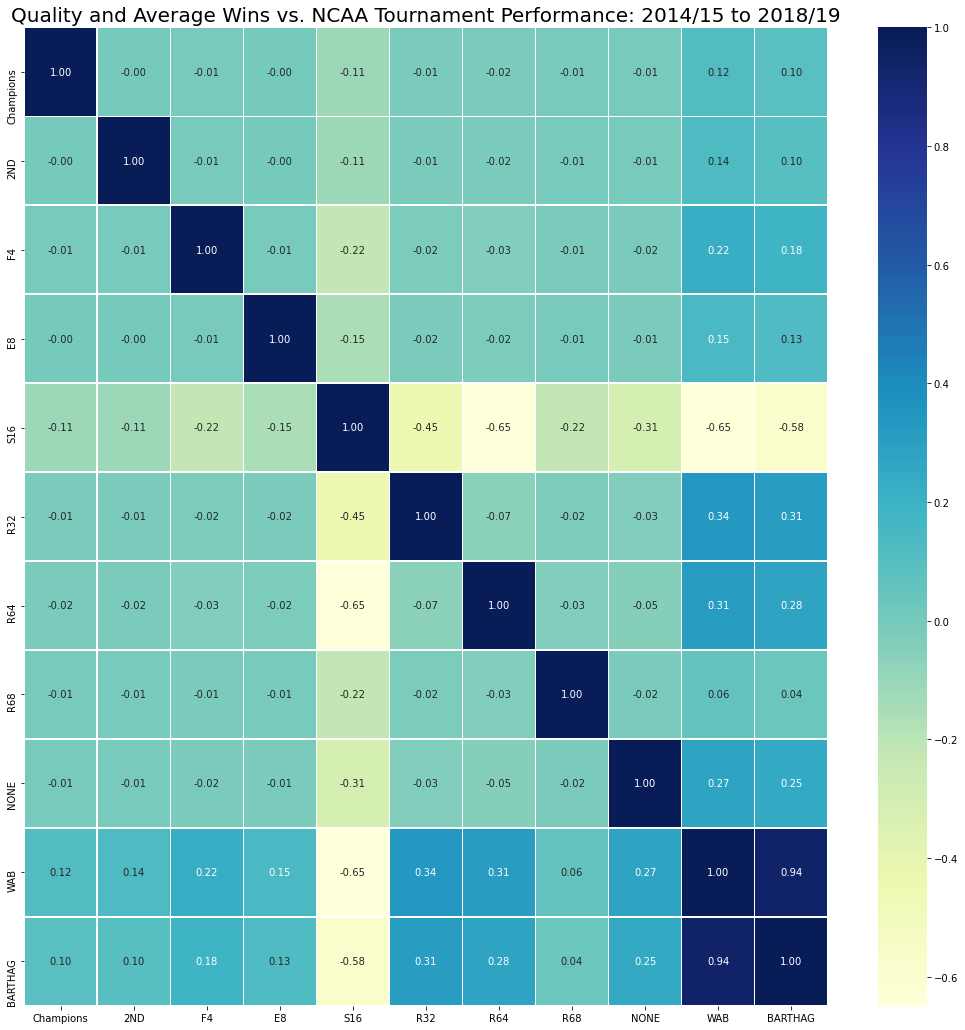

In [13]:
# Quality and Average Wins vs. Tournament Performance Matrix
# Select the features to do the analysis
df_CBB1_fs1 = df_CBB1[['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NONE','WAB', 'BARTHAG']]

#  Quality and Average Wins vs. Tournament Performance Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_CBB1_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Quality and Average Wins vs. NCAA Tournament Performance: 2014/15 to 2018/19', fontsize = 20)

This result is very interesting. What we see is that the a team's ability to beat a quality (Tournament-bound) team is only slightly more impactful to overall Tournament performance as compared to its ability to beat an average team. This would seem to indicate that so-called 'mid-Major' or 'non-power Conference' teams can easily compete against their more established counterparts in the postseason.

Another interesting result is the strongly negative correlation between beating quality/average teams and Tournament performance at the Sweet 16 level. A possible hypothesis for this result is that unlike earlier rounds of the NCAA Tournament, there is at least a 5 day gap between Round of 32 and Sweet 16 matchups, allowing teams to better prepare against their opponents.

Text(0.5, 1.0, 'Field Goal % vs. NCAA Tournament Performance: 2014/15 to 2018/19')

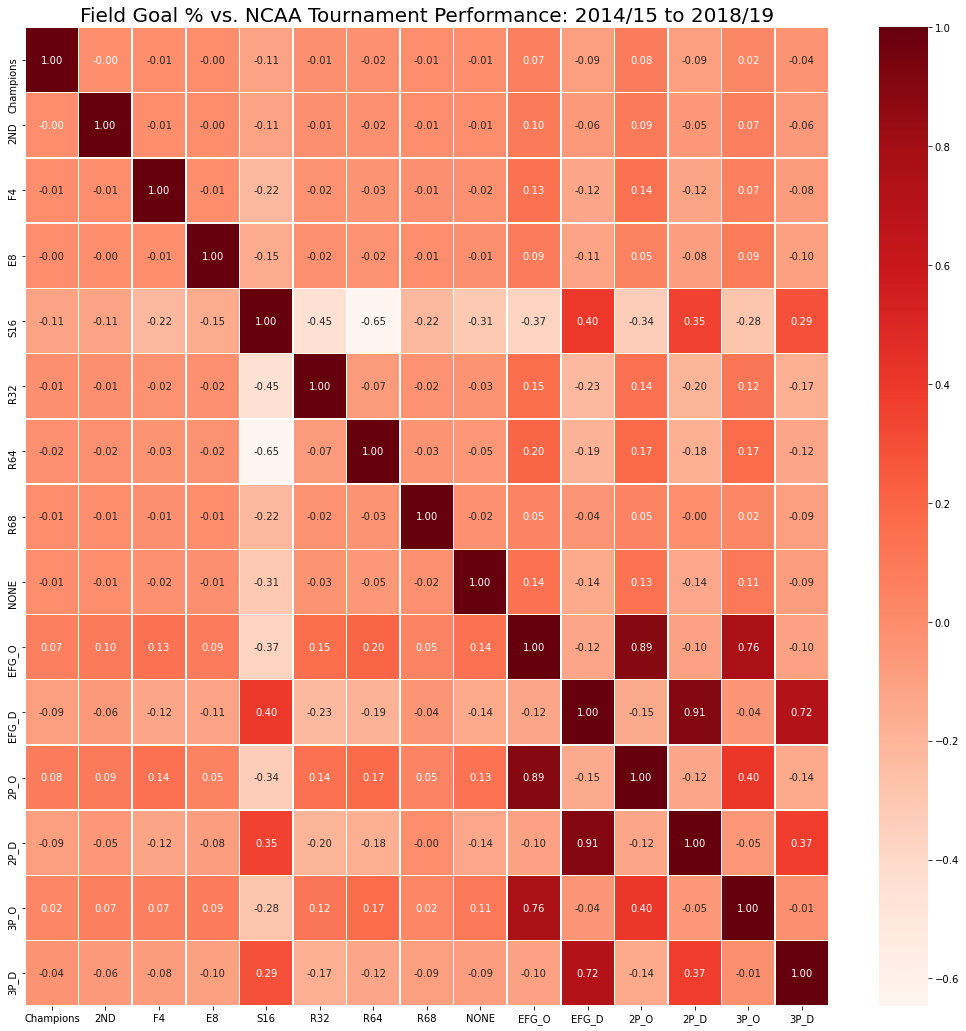

In [14]:
# Field Goal % vs. Tournament Performance Matrix
# Select the features to do the analysis
df_CBB1_fs2 = df_CBB1[['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NONE','EFG_O', 'EFG_D', '2P_O', 
                     '2P_D', '3P_O', '3P_D']]

#  Field Goal % vs. Tournament Performance Matrix
figureFG, axisFG = plt.subplots(figsize=(18, 18));
sns.heatmap(df_CBB1_fs2.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisFG, cmap="Reds");

plt.title('Field Goal % vs. NCAA Tournament Performance: 2014/15 to 2018/19', fontsize = 20)

Again, we see some interesting results. In the First Four (R68), First Round (R64), and Second Round (R32), Offensive FG % correlates very well, indicating that the ability to score is important in these early rounds. However, we see that in the Sweet 16 (S16), Defensive FG % correlates very well instead. Again, looking at our earlier hypothesis, it is possible with the increased ability to prepare for opponents between the Second Round and Sweet 16, teams can make adjustments to better defend against high scoring teams. It should be noted that the Elite 8 (E8), Final Four (F4), and National championship Game show a better correlation with Offensive FG %.

With regard to 2-Point FG % vs. 3-Point FG %, there appears to be little impact in the earlier rounds of the NCAA Tournament, while 2-Point FG % appears to be slightly more impactful in the later rounds. 

Text(0.5, 1.0, 'Efficiency and Turnovers vs. NCAA Tournament Performance: 2014/15 to 2018/19')

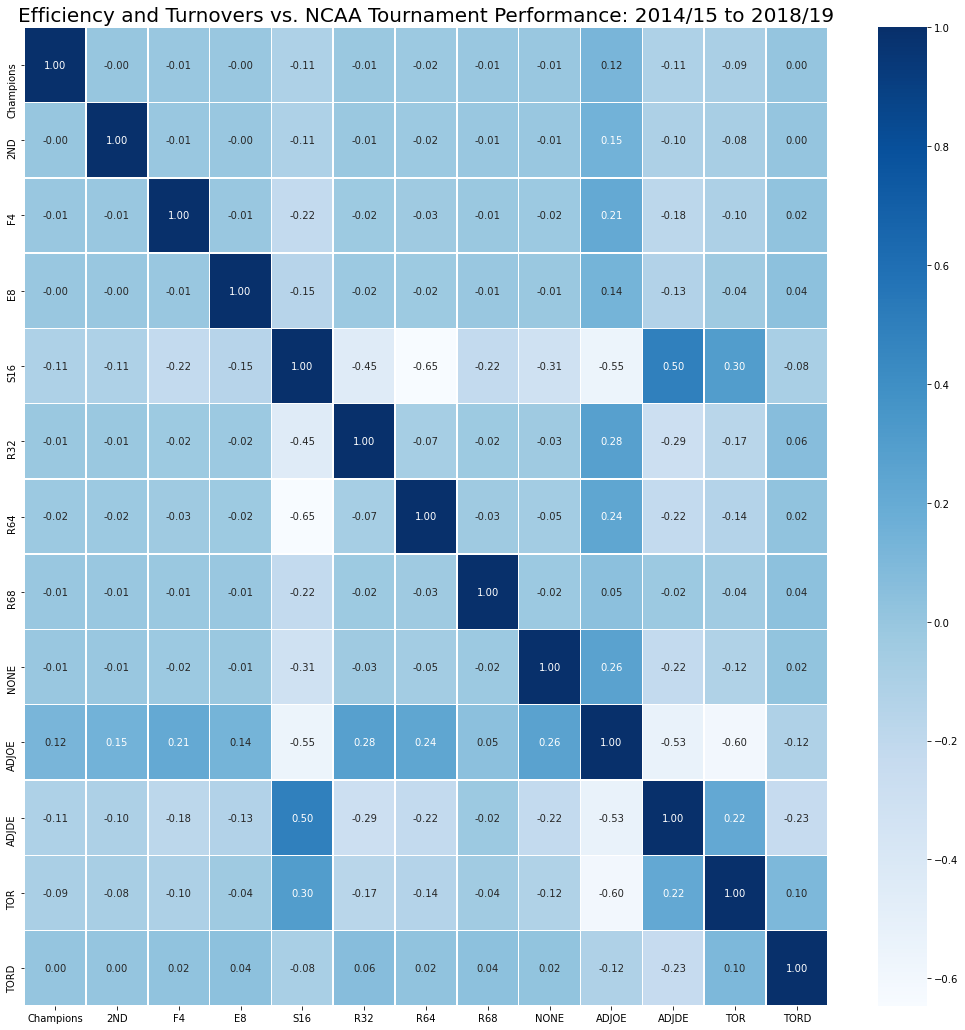

In [15]:
# Efficiency and Turnovers vs. Tournament Performance Matrix
# Select the features to do the analysis
df_CBB1_fs3 = df_CBB1[['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NONE','ADJOE', 'ADJDE', 'TOR', 'TORD']]

#  QEfficiency and Turnovers vs. Tournament Performance Matrix
figureEff, axisEff = plt.subplots(figsize=(18, 18));
sns.heatmap(df_CBB1_fs3.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisEff, cmap="Blues");

plt.title('Efficiency and Turnovers vs. NCAA Tournament Performance: 2014/15 to 2018/19', fontsize = 20)

Here we see two trends that stand out. First, offensive efficiency is strong correlated with advancing in the NCAA Tournament, especitally compared with defensive efficiency. Second, the ability to force turnovers is more important to a team's perfomance than avoiding turning the ball over oneself. 

However, these correlations appear to dampen as teams advance in the NCAA Tournament. A possible hypothesis is that one typically faces better teams in the later rounds that can (1) play better defense and (2) are not likely to turn the ball over.

Lets's wrap up our correlation analysis by looking at rebounding and free-throws.

Text(0.5, 1.0, 'Rebounding and Free Throws vs. NCAA Tournament Performance: 2014/15 to 2018/19')

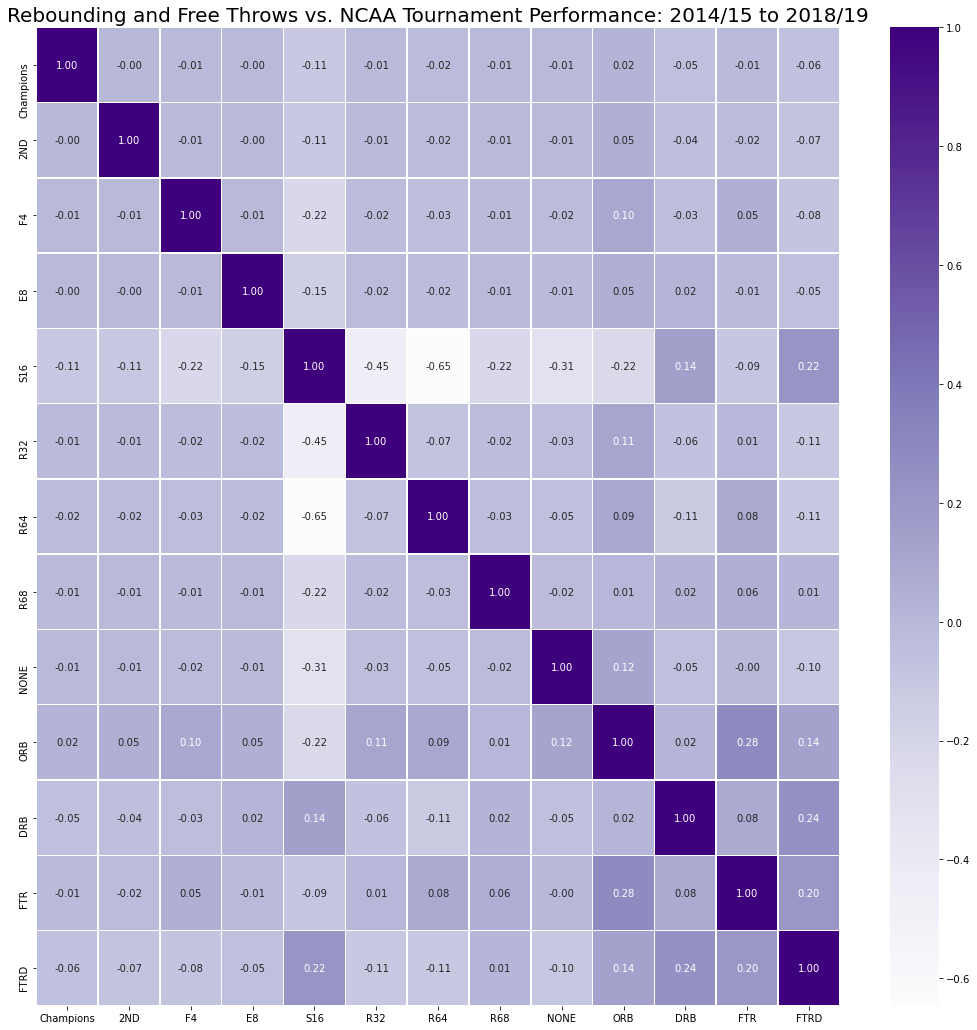

In [16]:
# Rebounding and Free-Throws vs. Tournament Performance Matrix
# Select the features to do the analysis
df_CBB1_fs4 = df_CBB1[['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NONE','ORB', 'DRB', 'FTR', 'FTRD']]

#  QEfficiency and Turnovers vs. Tournament Performance Matrix
figureRF, axisRF = plt.subplots(figsize=(18, 18));
sns.heatmap(df_CBB1_fs4.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisRF, cmap="Purples");

plt.title('Rebounding and Free Throws vs. NCAA Tournament Performance: 2014/15 to 2018/19', fontsize = 20)

This heatmap confirms many of our earlier conclusions. First and foremost, good offensive rebounding is important in the earlier rounds, which makes sense because it increases a team's ability to score through providing more possessions. Secondly, the reverse trends in the Sweet 16 are confirmed by defensive reboudning and fewer free throws allowed (which is indicative of a team staying out of foul trouble). Moreover, as we have seen, these trends to fade out in the later rounds.

Let's wrap this project up by looking at one final question. Based upon the statistics that we have, can we predict with any level of accuracy how likely a team is to make the NCAA Tournament? Final Four? That might be useful for making brackets in office pools!

## Machine Learning Model (NCAA Tournament)

Let's start by importing some of the libraries we will need to classify these teams as NCAA Tournament Teams and/or Final Four teams.

In [17]:
# Import Machine Learning Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import Machine Learning Metrics
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score

print('Machine Learning Libraries loaded into workspace!')

Machine Learning Libraries loaded into workspace!


In order to classify these teams, we will need to create separate datasets: one with either teams being 'Tournament Teams' or not, and another with teams being 'Final Four' or not.

In [18]:
# Create Tournament vs. Not dataset
df_CBBTournament = df_CBB.copy()
df_CBBTournament.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1,2017


In [19]:
# Change Values to Tournament (Y = 1) or (N = 0)
df_CBBTournament['POSTSEASON'].replace("NONE", 0, inplace=True)
df_CBBTournament['POSTSEASON'].replace("R68", 1, inplace=True)
df_CBBTournament['POSTSEASON'].replace("R64", 1, inplace=True)
df_CBBTournament['POSTSEASON'].replace("R32", 1, inplace=True)
df_CBBTournament['POSTSEASON'].replace("S16", 1, inplace = True)
df_CBBTournament['POSTSEASON'].replace("E8", 1, inplace = True)
df_CBBTournament['POSTSEASON'].replace("F4", 1, inplace = True)
df_CBBTournament['POSTSEASON'].replace("2ND", 1, inplace = True)
df_CBBTournament['POSTSEASON'].replace("Champions", 1, inplace = True)

# Display Values of Presence in NCAA Tournament or Not
df_CBBTournament.groupby('POSTSEASON').size()

POSTSEASON
0    1417
1     340
dtype: int64

Now that we have successfully created the classification, now we need to determine the variables we want for making our classification.

In [20]:
# Normalize Feature Selection subset using the Standard Scaler and Fit
df_CBBTournamentFS = df_CBBTournament[['W','ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 
                                       'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'POSTSEASON']]
df_CBBTournamentML = df_CBBTournamentFS.drop(['POSTSEASON'],axis=1)
df_CBBTournamentML = preprocessing.StandardScaler().fit(df_CBBTournamentML).transform(df_CBBTournamentML)

# Display the Normalized Set, setting the Machine Learning Set to 'X' to incorporate into the 'TrainX, TestY' methodology
X = df_CBBTournamentML;
X[0:5]

array([[ 2.51946228,  2.70544705, -1.33560209,  1.80121194,  0.7922926 ,
        -0.77403577, -1.60305955, -0.15238624,  2.78565094,  0.17398576,
        -0.57296223, -0.84303971,  1.39251782, -1.42914362, -0.6797331 ,
         0.61425725,  1.00606322],
       [ 2.97791797,  3.49965254, -1.53650356,  1.89015547,  1.49527155,
        -0.91395509, -3.10978688, -1.29070745,  0.68840416, -1.88422281,
         0.22569297, -2.19914301,  1.6555863 , -1.39872379,  0.70634778,
         1.16299981, -2.79996183],
       [ 2.51946228,  1.48675242, -2.03103027,  1.74008774,  1.20768925,
        -0.91395509, -2.30619897,  0.46420441, -0.92111081, -1.49218308,
        -0.90061565, -0.91084488,  1.62635647, -0.75990724,  0.23216222,
        -0.65207174, -0.7741743 ],
       [ 2.21382516,  1.59629801, -2.83463618,  1.86586253,  1.0798749 ,
        -2.55800715, -0.44790193,  2.02939606, -0.45776559, -0.25072395,
        -0.4500922 ,  0.20794034,  1.07098967, -2.25047919,  0.70634778,
        -2.12945556

Note that we took out Team, Conference, and wins against other tournament teams (since that would bias the data).

In [21]:
# Create the Target Value Variable
df_CBBTournamentTarget = df_CBBTournamentFS['POSTSEASON'].values

# Dsplay the Target Value Set
y = df_CBBTournamentTarget;
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Now we will create the training and test sets for our machine learning algorithm.

In [22]:
# Create Training and Test Sets
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=10)

# Display the Training Set
print ('Train set:', X_train.shape,  y_train.shape)

# Display the Test Set
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1405, 17) (1405,)
Test set: (352, 17) (352,)


Let's look at a few different classification algorithms, including K-Nearest Neighbor, Support Vector Machine, Decision Trees and Logistic Regression.

### K-Nearest Neighbor

In [23]:
# Import K-Nearest Neighbor Local Libraries
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

print('K-Nearest Neighbor libraries loaded into workspace!')

K-Nearest Neighbor libraries loaded into workspace!


In [24]:
# Create the KNN Model
kValue = range(1, 10)
knnAccuracy = []

for n in kValue:
    knnModel  = knn(n_neighbors = n)
    knnModel.fit(X_train, y_train)
    knn_yhat = knnModel.predict(X_test)
    knnAccuracy.append(accuracy_score(y_test, knn_yhat))

Text(0, 0.5, 'Accuracy Values')

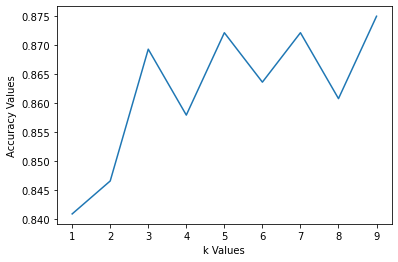

In [25]:
# Plot K Values vs Accuracy Score
plt.plot(kValue, knnAccuracy)
plt.xlabel('k Values')
plt.ylabel('Accuracy Values')

In [26]:
# Display the highest value of K
for i in range(0, len(knnAccuracy)):
    print("For k = {}, the accuracy = {}".format(i+1, knnAccuracy[i]))

For k = 1, the accuracy = 0.8409090909090909
For k = 2, the accuracy = 0.8465909090909091
For k = 3, the accuracy = 0.8693181818181818
For k = 4, the accuracy = 0.8579545454545454
For k = 5, the accuracy = 0.8721590909090909
For k = 6, the accuracy = 0.8636363636363636
For k = 7, the accuracy = 0.8721590909090909
For k = 8, the accuracy = 0.8607954545454546
For k = 9, the accuracy = 0.875


So we use a factor of k = 9 to construct our K-Nearest Neighbor Model.

In [27]:
# With a Maximum Value of 9, Create the final KNN Model
knnModel = knn(n_neighbors = 9)
knnModel.fit(X_train, y_train)
knn_yhat = knnModel.predict(X_test)

knnModel

KNeighborsClassifier(n_neighbors=9)

### Support Vector Machine

In [28]:
#Import Support Vector Machine needed local libraries
from sklearn.svm import SVC 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# Since the plots will involve Matplotlib features, we need to import that library as well
import matplotlib.pyplot as plt
%matplotlib inline

print('Support Vector Machine local libraries loaded into workspace!')

Support Vector Machine local libraries loaded into workspace!


In [29]:
# Create Kernel and Accuracy Score Objects
kernelFunction = ['linear', 'poly', 'rbf', 'sigmoid']
svmAccuracy = []

# For different functions, calculate the accuracy scores

for k in kernelFunction:
    svmModel = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svmModel.fit(X_train, y_train)
    svm_yhat = svmModel.predict(X_test)
    svmAccuracy.append(f1_score(y_test, svm_yhat, average = 'weighted'))

Text(0, 0.5, 'SVM Accuracy Score')

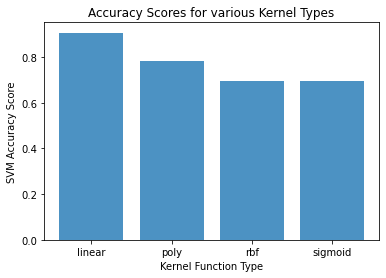

In [30]:
# Plot the Kernels vs Accuracy Scores
yPosition = np.arange(len(kernelFunction))
plt.bar(yPosition, svmAccuracy, align='center', alpha = 0.8)
plt.xticks(yPosition, kernelFunction)
plt.title('Accuracy Scores for various Kernel Types')
plt.xlabel('Kernel Function Type')
plt.ylabel('SVM Accuracy Score')

In [31]:
# Display the highest accuracy score for different kernel types
for i in range(0, len(svmAccuracy)):
    print("For kernel function type: {}, accuracy is {}.".format(i+1, svmAccuracy[i]))

For kernel function type: 1, accuracy is 0.9063716793822962.
For kernel function type: 2, accuracy is 0.7810556707136512.
For kernel function type: 3, accuracy is 0.6931005203064026.
For kernel function type: 4, accuracy is 0.6931005203064026.


In [32]:
# With a best value coming from poly (given the data type it is best choice among equals) , create the final SVM Model
svmModel = SVC(C = 0.01, gamma = 'auto', kernel = 'linear')
svmModel.fit(X_train, y_train)
svmModel

SVC(C=0.01, gamma='auto', kernel='linear')

### Decision Trees

In [33]:
# Import Decision Trees needed local libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print('Decision Trees local libraries loaded into workspace!')

Decision Trees local libraries loaded into workspace!


In [34]:
# Create Jaccard and F1 Score Objects
depthRange = range(1, 12)
jaccardSimilarityScore = []
f1Score = []

# For Varying Depths, calculate jaccard similarity and f1 scores
for n in depthRange:
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = n)
    dTree.fit(X_train, y_train)
    dTree_yhat = dTree.predict(X_test)
    jaccardSimilarityScore.append(jaccard_score(y_test, dTree_yhat))
    f1Score.append(f1_score(y_test, dTree_yhat, average = 'weighted'))

In [35]:
# Present the resulting data in a DataFrame
dTree_result = pd.DataFrame([jaccardSimilarityScore, f1Score], 
                             index = ['Jaccard Sim', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9', 'd = 10', 'd = 11'])
dTree_result.columns.name = 'Depths'
dTree_result

Depths,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11
Jaccard Sim,0.571429,0.571429,0.604651,0.546512,0.505618,0.505747,0.522222,0.478261,0.458333,0.443299,0.470000
F1,0.892363,0.892363,0.900233,0.883773,0.869292,0.871007,0.873445,0.858298,0.848306,0.842472,0.848301


In [36]:
# With a Maximum Depth of 3, create the final Decision Tree Model
dTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dTreeModel.fit(X_train, y_train)
dTreeModel

DecisionTreeClassifier(max_depth=3)

### Logistic Regression

In [37]:
# Import Logistic Regression needed local libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

# Since the plots will involve Matplotlib features, we need to import that library as well
import matplotlib.pyplot as plt
%matplotlib inline

print('Logistic Regression local libraries loaded into workspace!')

Logistic Regression local libraries loaded into workspace!


In [38]:
# Create Solver and Accuracy Score Objects
solverList = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularizationValueSet = [0.1, 0.01, 0.001]
index = []
lrAccuracy = []
iterations = 0

for p, q in enumerate(regularizationValueSet):
    for r, s in enumerate(solverList):
        index.append(p + r *5)
        iterations +=1
        lrModel = LogisticRegression(C = q, solver = s)
        lrModel.fit(X_train, y_train)
        lr_yhat = lrModel.predict(X_test)
        y_prob = lrModel.predict_proba(X_test)
        print('Test {}: With C = {} for solver = {}, LR Accuracy is : {}.'.format(iterations, q, s, log_loss(y_test, y_prob) ))
        lrAccuracy.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: With C = 0.1 for solver = lbfgs, LR Accuracy is : 0.24293355702959654.
Test 2: With C = 0.1 for solver = saga, LR Accuracy is : 0.24293695143602712.
Test 3: With C = 0.1 for solver = liblinear, LR Accuracy is : 0.24562457640311475.
Test 4: With C = 0.1 for solver = newton-cg, LR Accuracy is : 0.24293330745919572.
Test 5: With C = 0.1 for solver = sag, LR Accuracy is : 0.24293160564145086.


Test 6: With C = 0.01 for solver = lbfgs, LR Accuracy is : 0.2650321275517094.
Test 7: With C = 0.01 for solver = saga, LR Accuracy is : 0.2650316825752444.
Test 8: With C = 0.01 for solver = liblinear, LR Accuracy is : 0.3151324520889392.
Test 9: With C = 0.01 for solver = newton-cg, LR Accuracy is : 0.2650315315172948.
Test 10: With C = 0.01 for solver = sag, LR Accuracy is : 0.26502810081213224.


Test 11: With C = 0.001 for solver = lbfgs, LR Accuracy is : 0.35031964725267906.
Test 12: With C = 0.001 for solver = saga, LR Accuracy is : 0.3503198170470394.
Test 13: With C = 0.001 for solv

Text(0, 0.5, 'LR Accuracy')

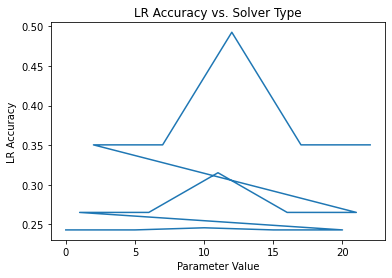

In [39]:
# Plot the Logistic Regression Accuracy Scores for different solver types
lrProbability = lrModel.predict_proba(X_test)
log_loss(y_test, lrProbability)
plt.plot(index, lrAccuracy)
plt.title('LR Accuracy vs. Solver Type')
plt.xlabel('Parameter Value')
plt.ylabel('LR Accuracy')

In [40]:
# With 'liblinear' giving the highest accuracy score, we create the final LR model
lrModel = LogisticRegression(C = 0.001, solver = 'liblinear')
lrModel.fit(X_train, y_train)
lrModel

LogisticRegression(C=0.001, solver='liblinear')

### Model Evaluations

In [41]:
# Import Model Evaluation local libraries
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print('Model Evaluation local libraries loaded into workspace!')

Model Evaluation local libraries loaded into workspace!


In [42]:
# Find Jaccard and f1 Scores for each algorithm
# K-Nearest Neighbor Model Scores
f1_KNN = f1_score(y_test, knn_yhat)
jss_KNN = jaccard_score(y_test, knn_yhat)
ps_KNN = precision_score(y_test, knn_yhat)
rs_KNN = recall_score(y_test, knn_yhat)

# Support Vector Machine Model Scores
f1_SVM = f1_score(y_test, svm_yhat)
jss_SVM = jaccard_score(y_test, svm_yhat)
ps_SVM = precision_score(y_test, svm_yhat)
rs_SVM = recall_score(y_test, svm_yhat)

# Decision Tree Model Scores
f1_dTree = f1_score(y_test, dTree_yhat, average='weighted')
jss_dTree = jaccard_score(y_test, dTree_yhat)
ps_dTree = precision_score(y_test, dTree_yhat)
rs_dTree = recall_score(y_test, dTree_yhat)

#Logistic Regression Model Scores
f1_lr = f1_score(y_test, lr_yhat, average='weighted')
jss_lr = jaccard_score(y_test, lr_yhat)
ps_lr = precision_score(y_test, lr_yhat)
rs_lr = recall_score(y_test, lr_yhat)

# Present Results
ModelResults = {'Classification Model': ['K-Nearest Neighbor', 'Support Vector Machine', 'Decision Trees', 
                                         'Logistic Regression'], 'f1 Score': [f1_KNN, f1_SVM, f1_dTree, f1_lr], 
                'Jaccard': [jss_KNN, jss_SVM, jss_dTree, jss_lr], 'Precision Score': [ps_KNN, ps_SVM, ps_dTree, ps_lr], 
                'Recall Score': [rs_KNN, rs_SVM, rs_dTree, rs_lr]};
df_ModelResults = pd.DataFrame(ModelResults);
df_ModelResults

C:\Users\jmsie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Classification Model,f1 Score,Jaccard,Precision Score,Recall Score
0,K-Nearest Neighbor,0.645161,0.476190,0.816327,0.533333
1,Support Vector Machine,0.000000,0.000000,0.000000,0.000000
2,Decision Trees,0.848301,0.470000,0.652778,0.626667
3,Logistic Regression,0.770680,0.173333,1.000000,0.173333


The best we can hope to predict whether a given Division 1 team will make the Tournament is approximately 47.6% using a K-Nearest Neighbor Algorithm. In other words, whether a team makes the NCAA Tournament or not is likely more dependent on external factors, such as performance in a conference tournament or the NCAA Selection Committee's 'eye-test'.

# Results and Discussion

The results of this project are both positive and negative. In the positive, we were able to demonstrate the following:

<ul>
    <li>There is minimial impact on NCAA Tournament performance on the quality of teams beaten in the regular season.</li>
    <li>Offensive FG % helps in the early rounds while Defensive FG % helps in the Sweet 16.</li>
    <li>Forcing turnovers is more indicative of NCAA Tournament success than committing turnovers.</li>
    <li>Offensive Rebounding and Free-Throws help in early rounds and less so in later rounds.</li>
    <li>The Sweet 16 game is probably the biggest decider in terms of winning the NCAA Tournament.</li></ul>

In the negative, we could not predict with any great accuracy based on the statistics available whether an individual team would make the NCAA Tournament or not. This fact leads the author to believe that the NCAA Selection Committee must more heavily rely on the so-called 'eye test' or performance in conference tournaments than any mathematical formula. So much for predicting brackets!

# Conclusions

The goal of this project was to explore any trends in NCAA Tournament performance. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!